In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [9]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

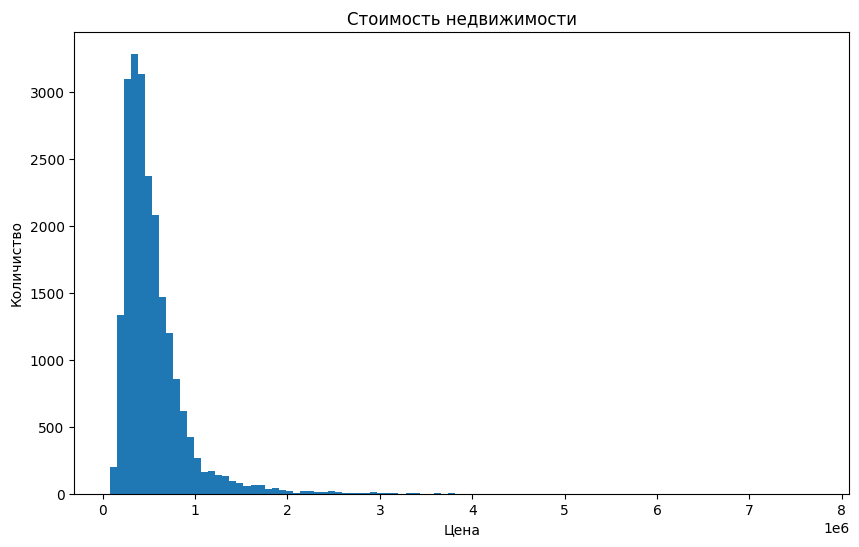

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количиство')
df['price'].describe()

### 1.3 Изучите распределение квадратуры жилой

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

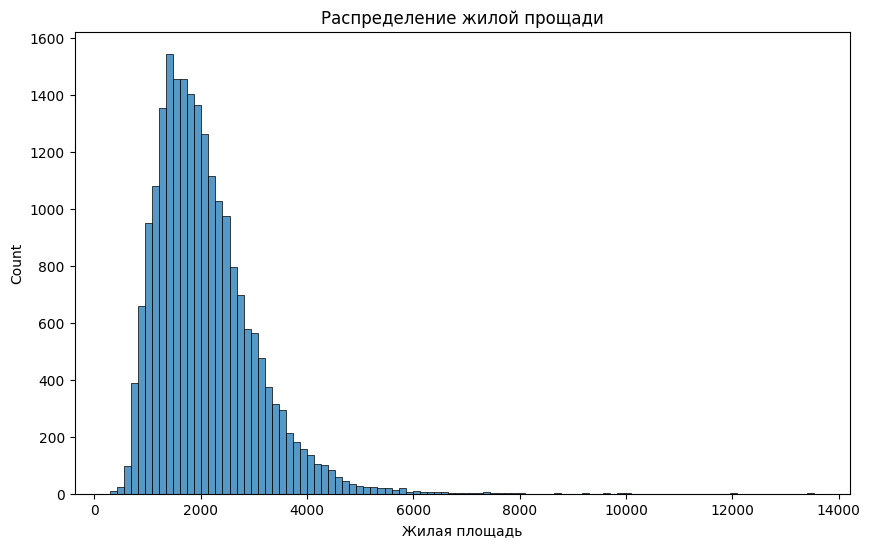

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение жилой прощади')
plt.xlabel('Жилая площадь')
df['sqft_living'].describe()

#### Большинство домов имеют от 2000 до 3000 квадратных метров жилой площади

### 1.4 Изучите распределение года постройки

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

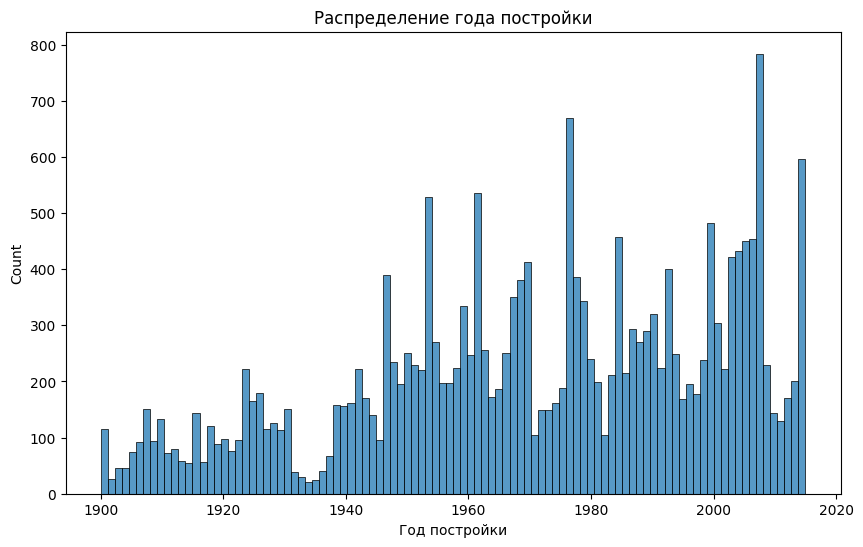

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=100)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
df['yr_built'].describe()

#### Наблюдается постепенный рост строительства. Вместе с тем, характерны периодические провалы и всплески, что говорит о большом влиянии внешних факторов, имеющих периодический характер. Наибольший провал в районе 1929-1939 годов - время великой дипрессии.

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [10]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

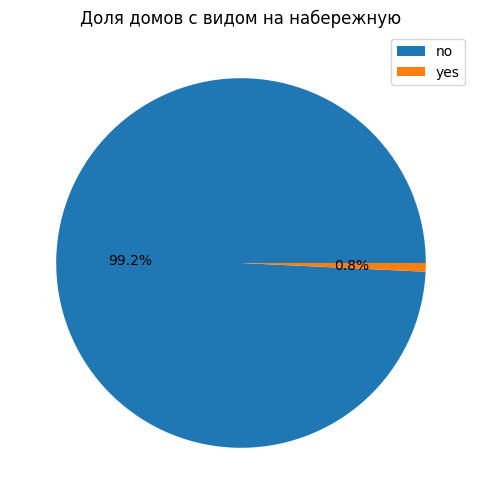

In [11]:
plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

#### Только 0.8% домов имеют вид на набережную

### 2.2 Изучите распределение этажей домов

In [12]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

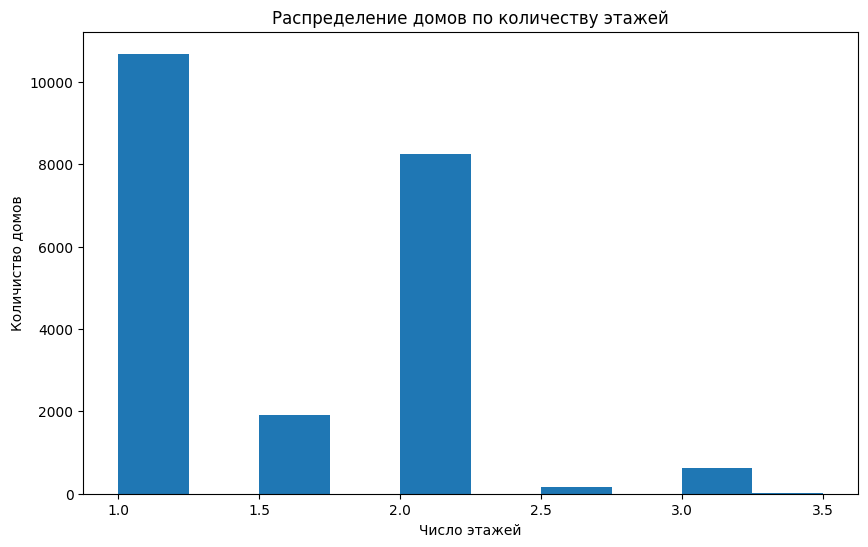

In [13]:
plt.figure(figsize=(10, 6))

plt.hist(df['floors'])

plt.title('Распределение домов по количеству этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количиство домов');

#### Большинство домов с одним этажом

### 2.2 Изучите распределение состояния домов

In [18]:
def calcExplodes(data):
    exp = []
    k = 1
    for val in data.values:
        if val < data.values.sum() / 20:
            exp.append(0.3 * k)
            k += 1
        else:
            exp.append(0)
    return exp

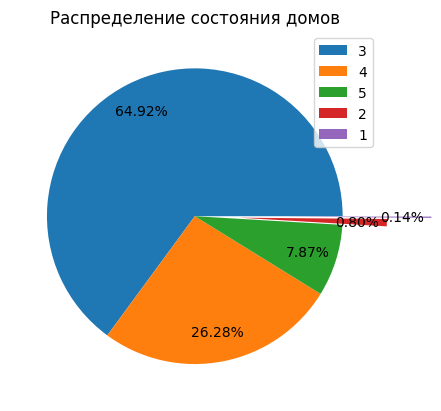

In [19]:
data = df['condition'].value_counts()

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("Распределение состояния домов");

#### Большинство домов с оценкой качества 3, а меньше всего 1

## Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

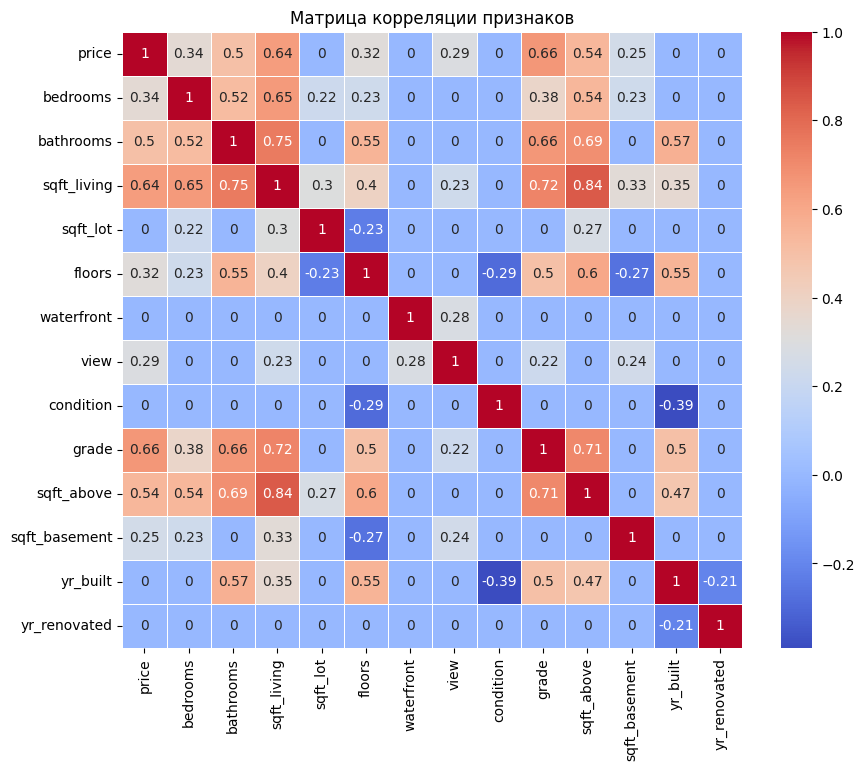

In [22]:
plt.figure(figsize=(10, 8))

corrMatrix = round(df.drop(
    columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
).corr(method='spearman'), 2)
corrMatrix[abs(corrMatrix) < 0.2] = 0

sns.heatmap(corrMatrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Матрица корреляции признаков");

#### Если рассматривать цену дома, то не найдена корреляция с этажностью и площадью участка, а также состоянием. Зато цена сильно зависит от жилой площади и в меньшей степени от количества спален и ванных. То, что цена зависит от площади чердака, говорит о большом распростанении 1-но этажных домов.

#### Зависимость цены от жилой площади:

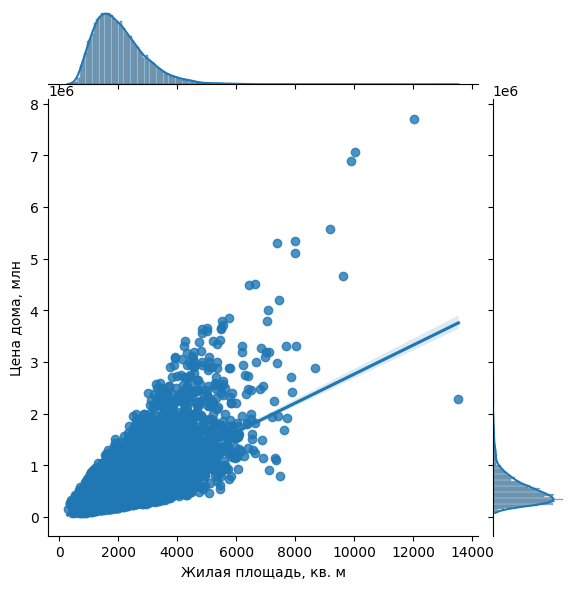

In [23]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. м")
plt.ylabel("Цена дома, млн");

#### Имеется выраженная зависимость цены от жилой площади, зависимость более чёткая в нижнем ценовом диапазоне и для небольших площадей. Большой разброс цен домов большой площади говорит о влиянии других факторов и специфичности требований покупателей.

In [26]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

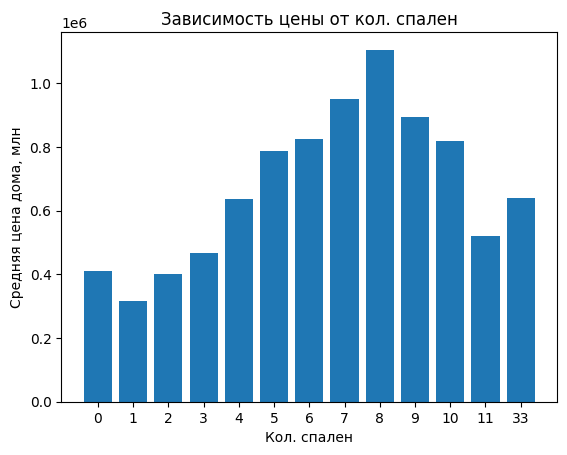

In [27]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

#### Дома без спален, ориентированы на какие-то специальые требования (возможно, студии), что делает их немного дороже, чем дома с 2-мя спальнями. Для домов с 1 по 8 спален прослеживается равномерный рост цены. Дома с большим количеством спален, имеют более простые условия, и уменьшаются в цене.

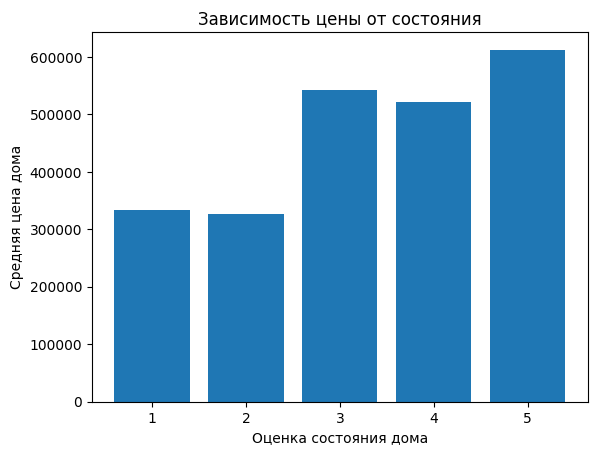

In [28]:
data = formDepData('condition', 'price', df)

plt.bar(
    data['condition'],
    data['price']
)

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

#### Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается некоторое увеличение цены для домов в лучшем состоянии. Слабая выраженность зависимости связана с малой долей домов в плохом состоянии.

<Figure size 800x600 with 0 Axes>

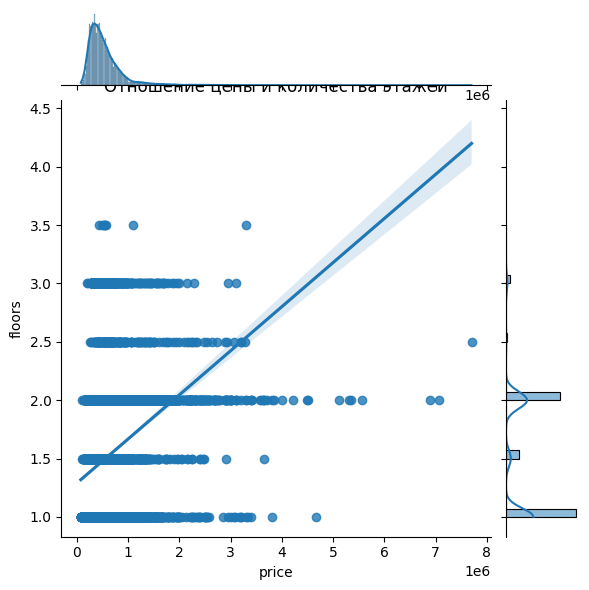

In [29]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['floors'], kind='reg')
plt.title('Отношение цены и количества этажей');

#### Из графика видно, что наиболее ценятся дома не выше 2.5 этажей. Выше дома теряют в цене

<Figure size 800x600 with 0 Axes>

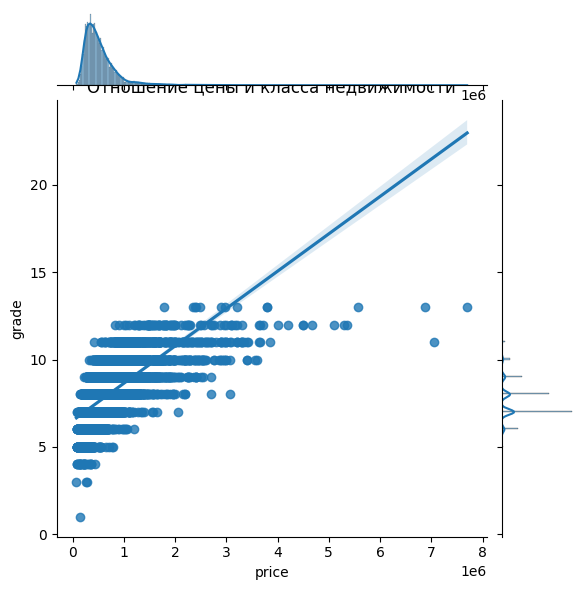

In [30]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.title('Отношение цены и класса недвижимости');

#### Из графика видно, что класс жилья существенно влияет на его стоимость